In [ ]:
#Prepare document:
#use PDFMiner
#run from command line: pdf2txt.py -o NewTextFileName.txt -t text PDFName.pdf
#creates TXT file from PDF. still lots of whitespace

In [168]:
import re
import pandas as pd

In [152]:
#read lines from TXT file as list of strings
lines = [line.rstrip('\n') for line in open('C:/Users/bschroeder/Documents/DataScience/number2.txt')]

In [153]:
lines

['Official - Subject to Final Review ',
 '',
 '   ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 '       ',
 '',
 'IN THE SUPREME COURT OF THE UNITED STATES ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 '- - - - - - - - - - - - - - - - - x ',
 '',
 '                                 ',
 '',
 'JAE LEE, ',
 '',
 ' ',
 '',
 '                          ',
 '',
 ': ',
 '',
 '            ',
 '',
 'Petitioner ',
 '',
 '               ',
 '',
 ':  No. 16-327 ',
 '',
 ' ',
 '',
 '1 ',
 '',
 '       ',
 '',
 'v. ',
 '',
 '                         ',
 '',
 'UNITED STATES, ',
 '',
 ' ',
 '',
 '                    ',
 '',
 ': ',
 '',
 ': ',
 '',
 '            ',
 '',
 'Respondent. ',
 '',
 '           ',
 '',
 ': ',
 '',
 '- - - - - - - - - - - - - - - - - x ',
 '',
 '                                 ',
 '',
 '                       ',
 '',
 'Washington, D.C. ',
 '',
 ' ',
 '',
 '                       ',
 '',
 'Tuesday, March 28, 2017 ',
 '',
 ' ',
 '',
 ' ',
 '',


In [160]:
#major stopwords: header, footer, line numbers
MyStop = ['Alderson Reporting Company ', '\x0cOfficial - Subject to Final Review ', '\x0c1', 
          '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
         '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']

In [ ]:
import re

In [163]:
#RegEx for lines of whitespace between 1 and 10 characters
whitespace = re.compile('^\s{1,10}')

In [164]:
#remove whitespace
lines[:] = [x for x in lines if not whitespace.match(x)]

In [165]:
lines

['Official - Subject to Final Review ',
 'IN THE SUPREME COURT OF THE UNITED STATES ',
 '- - - - - - - - - - - - - - - - - x ',
 'JAE LEE, ',
 ': ',
 'Petitioner ',
 ':  No. 16-327 ',
 '1 ',
 'v. ',
 'UNITED STATES, ',
 ': ',
 ': ',
 'Respondent. ',
 ': ',
 '- - - - - - - - - - - - - - - - - x ',
 'Washington, D.C. ',
 'Tuesday, March 28, 2017 ',
 'The above-entitled matter came on for oral ',
 'argument before the Supreme Court of the United States ',
 'at 10:09 a.m. ',
 'APPEARANCES: ',
 'JOHN J. BURSCH, ESQ., Caledonia, Mich.; on behalf of ',
 'the Petitioner. ',
 'ERIC J. FEIGIN, ESQ., Assistant to the Solicitor ',
 'General, Department of Justice, Washington, D.C.; ',
 'on behalf of the Respondent. ',
 'C O N T E N T S ',
 'ORAL ARGUMENT OF ',
 'JOHN J. BURSCH, ESQ. ',
 '2 ',
 'PAGE ',
 'On behalf of the Petitioner ',
 '3 ',
 'ORAL ARGUMENT OF ',
 'ERIC J. FEIGIN, ESQ. ',
 'On behalf of the Respondent ',
 'REBUTTAL ARGUMENT OF ',
 'JOHN J. BURSCH, ESQ. ',
 'On behalf of the Petiti

In [166]:
#remove header/footer/line stopwords
lines[:] = [x for x in lines if x not in MyStop]

In [167]:
lines

['Official - Subject to Final Review ',
 'IN THE SUPREME COURT OF THE UNITED STATES ',
 '- - - - - - - - - - - - - - - - - x ',
 'JAE LEE, ',
 ': ',
 'Petitioner ',
 ':  No. 16-327 ',
 '1 ',
 'v. ',
 'UNITED STATES, ',
 ': ',
 ': ',
 'Respondent. ',
 ': ',
 '- - - - - - - - - - - - - - - - - x ',
 'Washington, D.C. ',
 'Tuesday, March 28, 2017 ',
 'The above-entitled matter came on for oral ',
 'argument before the Supreme Court of the United States ',
 'at 10:09 a.m. ',
 'APPEARANCES: ',
 'JOHN J. BURSCH, ESQ., Caledonia, Mich.; on behalf of ',
 'the Petitioner. ',
 'ERIC J. FEIGIN, ESQ., Assistant to the Solicitor ',
 'General, Department of Justice, Washington, D.C.; ',
 'on behalf of the Respondent. ',
 'C O N T E N T S ',
 'ORAL ARGUMENT OF ',
 'JOHN J. BURSCH, ESQ. ',
 '2 ',
 'PAGE ',
 'On behalf of the Petitioner ',
 '3 ',
 'ORAL ARGUMENT OF ',
 'ERIC J. FEIGIN, ESQ. ',
 'On behalf of the Respondent ',
 'REBUTTAL ARGUMENT OF ',
 'JOHN J. BURSCH, ESQ. ',
 'On behalf of the Petiti

In [169]:
#RegEx for all speakers (Mr, Ms, Chief Justice, Justice)
retext = re.compile('^(M.\.|CHIEF JUSTICE|JUSTICE) \w*:  ')

In [170]:
#RegEx for all non-Justice (Mr, Ms)
orator = re.compile('^(M.\.) \w*:  ')

In [171]:
#instantiate blanks
speakers = pd.DataFrame(index=[],columns = ['Side', 'Speaker', 'Words'])
NewWords = ''
Speaker = ''
Side = ''
Index = 0

#if line begins with speaker, append the previous statement with the previous Speaker
#if a new orator is encountered, change the Side
#otherwise continue to add the statement
for i in lines:
    if retext.match(i):
        if Index > 0:
            NewLine = pd.DataFrame(data=[[Side,Speaker,NewWords]],index=[Index],columns=['Side', 'Speaker', 'Words'])
            speakers = speakers.append(NewLine)
        Index += 1
        Speaker = i.split(':  ')[0]
        NewWords = i.split(':  ')[1]
        if orator.match(i):
            if Speaker != Side:
                Side = Speaker
    else:
        NewWords += i
        

In [172]:
speakers

,Side,Speaker,Words
1,,CHIEF JUSTICE ROBERTS,We'll hear argument this morning in case 16-32...
2,MR. BURSCH,MR. BURSCH,"Thank you, Mr. Chief Justice, and may it pleas..."
3,MR. BURSCH,JUSTICE KENNEDY,"In -- in State courts, do State -- are State c..."
4,MR. BURSCH,MR. BURSCH,Yeah. I think in most State courts they do fo...
5,MR. BURSCH,JUSTICE KENNEDY,Do -- do they also tell --4 advise the defenda...
6,MR. BURSCH,MR. BURSCH,"I mean, in State courts, every court would hav..."
7,MR. BURSCH,JUSTICE KENNEDY,But I -- I don't quite see that in -- in --that.
8,MR. BURSCH,MR. BURSCH,Let -- let me walk you through
9,MR. BURSCH,JUSTICE KENNEDY,"-- at -- at 103 of -- of the Joint Appendix, w..."
10,MR. BURSCH,MR. BURSCH,Yes.


In [173]:
#add Length of each statement
Length = []
for i in speakers.index:
    Length.append(len(speakers.iloc[i-1].Words))
    

In [174]:
speakers['Length'] = Length

In [175]:
speakers

,Side,Speaker,Words,Length
1,,CHIEF JUSTICE ROBERTS,We'll hear argument this morning in case 16-32...,143
2,MR. BURSCH,MR. BURSCH,"Thank you, Mr. Chief Justice, and may it pleas...",480
3,MR. BURSCH,JUSTICE KENNEDY,"In -- in State courts, do State -- are State c...",237
4,MR. BURSCH,MR. BURSCH,Yeah. I think in most State courts they do fo...,102
5,MR. BURSCH,JUSTICE KENNEDY,Do -- do they also tell --4 advise the defenda...,168
6,MR. BURSCH,MR. BURSCH,"I mean, in State courts, every court would hav...",452
7,MR. BURSCH,JUSTICE KENNEDY,But I -- I don't quite see that in -- in --that.,49
8,MR. BURSCH,MR. BURSCH,Let -- let me walk you through,31
9,MR. BURSCH,JUSTICE KENNEDY,"-- at -- at 103 of -- of the Joint Appendix, w...",70
10,MR. BURSCH,MR. BURSCH,Yes.,5


In [197]:
argument= speakers.groupby(['Side','Speaker'])['Length'].sum().reset_index()

In [198]:
argument

,Side,Speaker,Length
0,,CHIEF JUSTICE ROBERTS,143
1,MR. BURSCH,CHIEF JUSTICE ROBERTS,2209
2,MR. BURSCH,JUSTICE ALITO,3369
3,MR. BURSCH,JUSTICE BREYER,3780
4,MR. BURSCH,JUSTICE GINSBURG,1487
5,MR. BURSCH,JUSTICE KAGAN,1123
6,MR. BURSCH,JUSTICE KENNEDY,2608
7,MR. BURSCH,JUSTICE SOTOMAYOR,2486
8,MR. BURSCH,MR. BURSCH,15749
9,MR. FEIGIN,CHIEF JUSTICE ROBERTS,1869


In [177]:
speakers.groupby(['Side','Speaker'])['Length'].size()

Side        Speaker              
            CHIEF JUSTICE ROBERTS     1
MR. BURSCH  CHIEF JUSTICE ROBERTS    10
            JUSTICE ALITO            18
            JUSTICE BREYER           25
            JUSTICE GINSBURG          8
            JUSTICE KAGAN            10
            JUSTICE KENNEDY          16
            JUSTICE SOTOMAYOR        14
            MR. BURSCH               94
MR. FEIGIN  CHIEF JUSTICE ROBERTS     8
            JUSTICE ALITO             7
            JUSTICE BREYER            6
            JUSTICE GINSBURG          3
            JUSTICE KAGAN            23
            JUSTICE KENNEDY          11
            JUSTICE SOTOMAYOR        19
            MR. FEIGIN               76
Name: Length, dtype: int64

In [179]:
import seaborn as sns

In [185]:
import matplotlib.pyplot as plt

In [188]:
import numpy as np

In [189]:
logLength = np.log(speakers.Length)

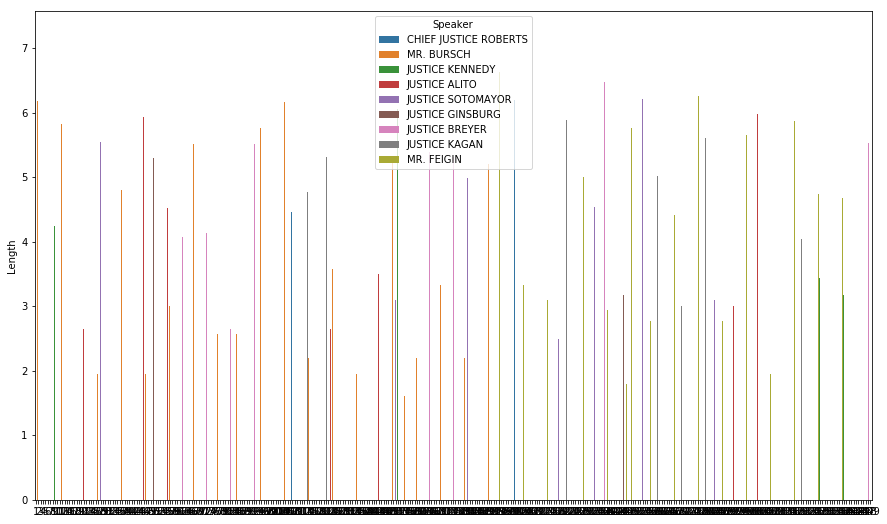

In [190]:
plt.figure(num=1, figsize=(15, 9));
ax = sns.barplot(x=speakers.index,y=logLength,hue=speakers.Speaker);

In [200]:
import spacy

In [201]:
import spacy.en

ModuleNotFoundError: No module named 'spacy.en'